In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


In [2]:
df = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')

# Data Overview

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.shape

(10000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [8]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

# Visualization

**Studying Hours**

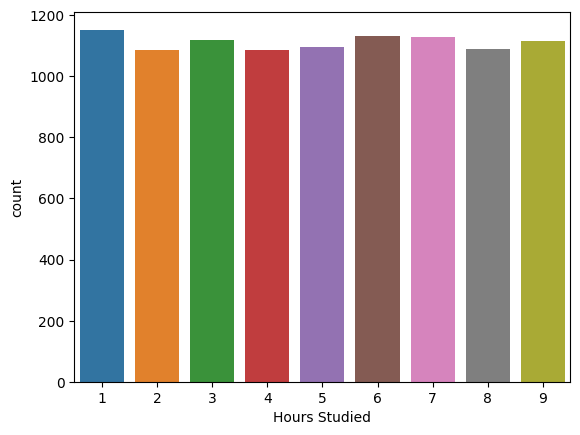

In [9]:
sns.countplot(x = 'Hours Studied', data = df)
plt.show()

**Previous Scores**

<Axes: ylabel='Previous Scores'>

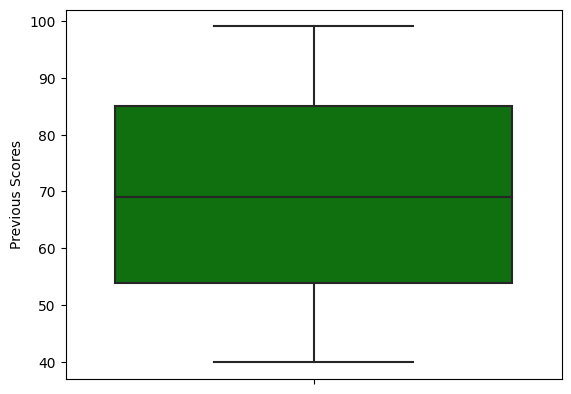

In [10]:
sns.boxplot(y = 'Previous Scores', data =df, color='g')

# Extracurricular Activities

Text(0, 0.5, '')

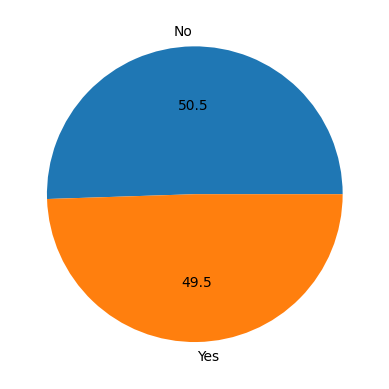

In [11]:
df['Extracurricular Activities'].value_counts().plot(kind = 'pie', autopct = '%.1f')
plt.ylabel(None)

**Student performance wrt hours studied**

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

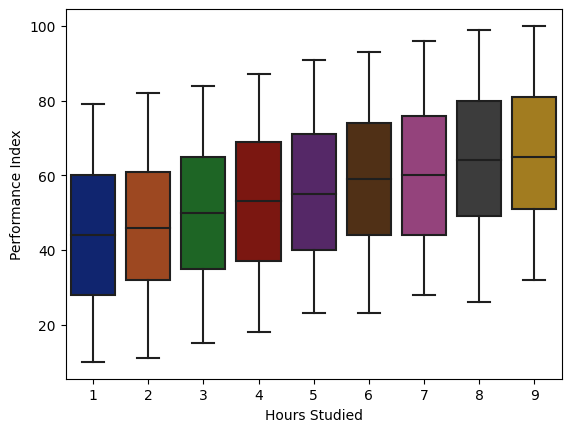

In [12]:
sns.boxplot(x = 'Hours Studied' , y = 'Performance Index', data =df, palette = 'dark')

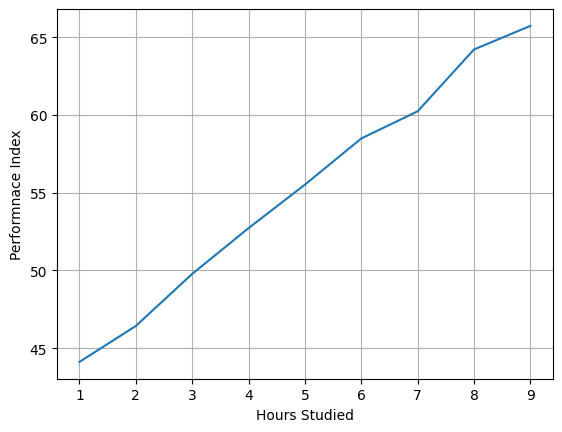

In [13]:
df.groupby('Hours Studied')['Performance Index'].mean().plot()
plt.xlabel('Hours Studied')
plt.ylabel('Performnace Index')
plt.grid()

**Student Performnace wrt to Extra curricular activities**

<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

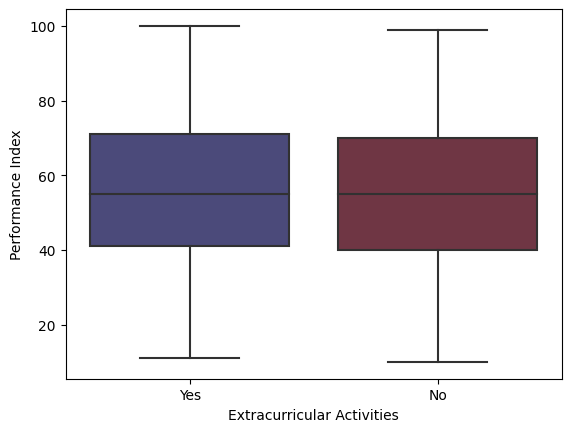

In [14]:
sns.boxplot(x = 'Extracurricular Activities', y = 'Performance Index', data = df, palette = 'icefire')

# Correlation

In [15]:
df_num = df.select_dtypes(exclude= ['object'])

<Axes: >

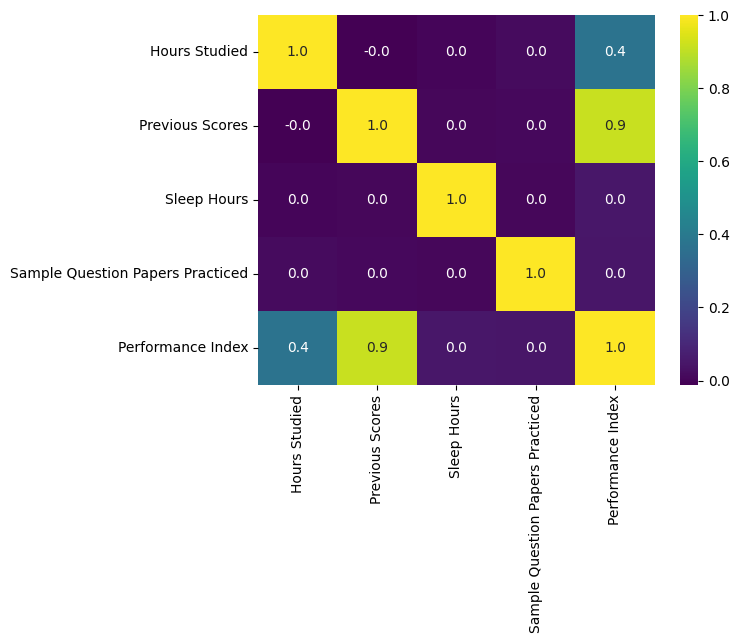

In [16]:
sns.heatmap(df_num.corr(), annot = True, cmap = 'viridis', fmt = '.1f')

**Correlation between Hours studied and Perf Index -> 0.4**

**Prev Score and Perf Index -> 0.9**

# Linear Regression

**Data Preprocessing**

In [17]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [18]:
scaler = StandardScaler()
le = LabelEncoder()

In [19]:
df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])

In [20]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


# Feature Target selection

In [21]:
x = df.drop('Performance Index', axis = 1)
y = df['Performance Index']

# Standardization

In [22]:
x[x.columns] = scaler.fit_transform(x[x.columns])

In [23]:
x.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.775188,1.704176,1.010455,1.456205,-1.249754
1,-0.383481,0.723913,-0.989654,-1.492294,-0.900982
2,1.161410,-1.063626,1.010455,0.276805,-0.900982
3,0.002742,-1.005963,1.010455,-0.902594,-0.900982
4,0.775188,0.320275,-0.989654,0.866505,0.145333


# Train test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
x_train.shape,x_test.shape

((8000, 5), (2000, 5))

# Model Training

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [28]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

# Prediction Accuracy

In [29]:
y_pred = lr.predict(x_test)

In [30]:
y_pred[0:3]

array([54.71185392, 22.61551294, 47.90314471])

In [31]:
y_test.head(3)

6252    51.0
4684    20.0
1731    46.0
Name: Performance Index, dtype: float64

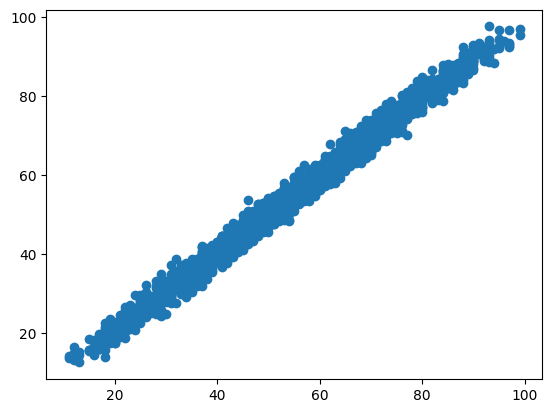

In [32]:
plt.scatter(y_test,y_pred)

**The Predictions are quite close :)**

In [33]:
# mean squared error(MSE)
mse = mean_squared_error(y_test,y_pred)
mse

4.082628398521855

In [34]:
# root mean squared error(RMSE)
mse**0.5

2.020551508505006

In [35]:
# mean absolute error(MAE)
mean_absolute_error(y_test,y_pred)

1.6111213463123046

# OLS

In [36]:
df.rename(columns={
    'Hours Studied': 'Hours',
    'Previous Scores': 'Prev_Scores',
    'Extracurricular Activities': 'Extra_Activities',
    'Sleep Hours': 'Sleep',
    'Sample Question Papers Practiced': 'Papers_Practiced',
    'Performance Index': 'Perf_Index'
}, inplace=True)

In [37]:
df.head()

,Hours,Prev_Scores,Extra_Activities,Sleep,Papers_Practiced,Perf_Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [38]:
import statsmodels.formula.api as smf

In [39]:
model = smf.ols('Perf_Index ~ Hours + Prev_Scores + Papers_Practiced + Extra_Activities + Sleep', data=df)
results = model.fit()

In [40]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Perf_Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Fri, 06 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:05:27   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -34.0756      0.127  

**Equation of our multiple linear regression model is :**

Performance Index = 2.85 × Hours Studied + 1.02 × Previous Scores + 0.61 × Extracurricular Activities + 0.48 × Sleep Hours + 0.19 × Sample Question Papers Practiced - 33.92

# Interpretation

Based on the OLS Regression Results displayed in the image:

### Key Metrics:
1. **Dependent Variable**: `Perf_Index`
2. **R-squared**: 0.989 – This suggests that 98.9% of the variability in the performance index is explained by the independent variables in the model. This is a very high value, indicating a strong fit of the model.
3. **Adj. R-squared**: 0.989 – The adjusted R-squared is close to the R-squared value, confirming that the model remains strong even after adjusting for the number of predictors.
4. **F-statistic**: 1.757e+05 – This value indicates that the overall model is statistically significant.
5. **Prob (F-statistic)**: 0.00 – The model's overall significance (P-value) is very low, indicating that the predictors collectively influence the `Perf_Index`.

### Coefficients:
1. **Intercept**: -34.0756 – When all independent variables are zero, the `Perf_Index` would be approximately -34.08.
2. **Hours**: 2.8530 – For every additional hour studied, the performance index increases by 2.85 units. This is highly significant (`P>|t| = 0.000`).
3. **Prev_Scores**: 1.0184 – For each unit increase in previous scores, the performance index increases by 1.02 units, with a very significant impact (`P>|t| = 0.000`).
4. **Papers_Practiced**: 0.1938 – Practicing more sample question papers increases the performance index by 0.19 units, which is statistically significant.
5. **Extra_Activities**: 0.6129 – Participation in extracurricular activities is associated with a 0.61 unit increase in the performance index.
6. **Sleep**: 0.4806 – Additional sleep hours positively affect performance, with a 0.48 unit increase per extra hour of sleep.

### Statistical Significance:
All variables (hours studied, previous scores, papers practiced, extracurricular activities, and sleep hours) are statistically significant (`P>|t|` values are all 0.000), meaning they have a significant effect on the performance index.

### Residual Analysis:
1. **Durbin-Watson**: 2.001 – This value suggests that there is no significant autocorrelation in the residuals.
2. **Omnibus/Prob(Omnibus)**: A slightly high value suggests the residuals are normally distributed.
3. **Jarque-Bera (JB)**: Prob(JB) = 0.133 – Since this value is greater than 0.05, the assumption of normality holds.

### Summary:
The model is a strong predictor of `Perf_Index` with all independent variables showing significant positive relationships. The model fit is excellent, with an R-squared of 0.989. Key influencers of performance include hours studied, previous scores, and extracurricular activities.